# 1. 마켓과 머신러닝 - K-최근접 방식
우선, 데이터를 리스트의 형태로 준비한다.
다음 리스트는 도미(bream)의 길이와, 무게를 나타낸 리스트를 준비했다.

In [ ]:
bream_length = [ 25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0,
                34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]

bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0,
                685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]


 **`import`**문을 통해**`matplotlib.pyplot`**을 가져온다.
  'as'를 통해 약어로써 사용할 수 있는데, 약어를 'plt'으로 사용하는 것이 관례이다.
  **`plt.scatter`**를 통해, 산점도를 그릴 수 있다. 첫 번째 변수로는 x축에 올 정보를, 두 번째 변수로는 y축에 올 정보를 받는다.

  **`plt.show()`**를 통해, 결과를 확인할 수 있다.

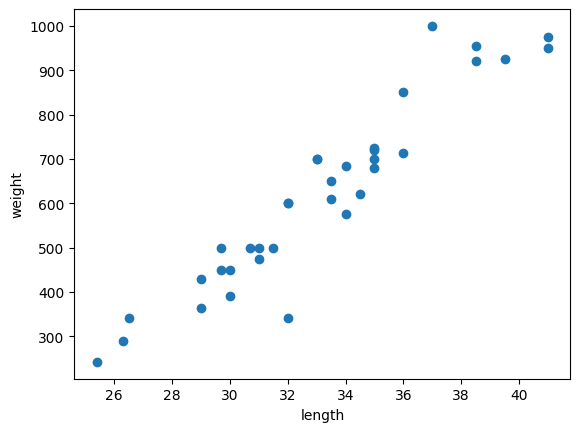

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

이번엔 빙어(smelt) 데이터를 가지고 와서, 하나의 산점도에 나타내보려한다.

**`plt.scatter`** 문을 여러 번 쓰면, 산점도를 여러 개 출력하지 않고, 하나의 산점도 내에서 점의 색을 달리해 보여준다.

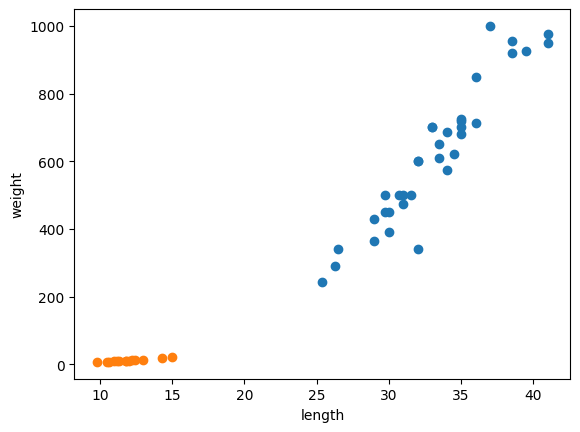

In [ ]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

import matplotlib.pyplot as plt
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

그러나, 우리가 사용할 사이킷런은 2차원 배열로 데이터를 받아야한다.
<br> 따라서, 우선 두 리스트를 하나로 합친 뒤, 2차원 배열로써 만들어보려 한다.
<br> 우선, 두 리스트를 '+' 연산자를 통해 하나로 합친다.

In [ ]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

따라서, **리스트 내포**를 통해, 위 2개의 리스트를 하나의 2차원 리스트로 만들어보려한다.
<p>
아래의 문장은 리스트 안에 for문이 있는 형식이다. 하나하나 뜯어서 살펴보자면
<br>
for l, w in zip(length, weight) : length의 원소를 l에, weight의 원소를 w에 넣는다. for문이 끝날 때까지, 즉 length와 weight의 모든 원소를 l과 w에 담을 때까지 넣는다.
<br>
[l,w] : 그렇게 옮겨담은 뒤, 리스트의 형식으로 저장한다.

In [ ]:
fish_data = [ [l,w] for l, w in zip(length, weight)]

**정답 데이터**를 만든다. <p>
이진 분류의 경우, 정답은 1, 아니면 0으로 설정한다.

In [ ]:
fish_target = [1]*35 + [0]*14

###K-최근접 이웃
> K-최근접 이웃의 원리 : 어느 샘플과 가까운지?
  
k-최근접 이웃 클래스를 통해, 잘 분류 했는지를 확인한다.

`from sklearn.neighbors` : 사이킷런의 neighbors 모듈에서 <br>
`import KNeighborsClassifier` : KNeighborsClassifier 클래스를 가져온다. <br>
`kn = KNeighborsClassifier()` : 클래스를 사용할 때는, 뒤에 ()을 붙여 클래스의 인스턴스를 만들어야한다. <br>
`kn.fit(fish_data, fish_target)` : fish_data와 fish_targert을 통해 머신러닝 모델을 만든다. <br>
`kn.score(fish_data, fish_target)` : 잘 맞게 분류했는지 확인(score)한다. 0~1 사이의 값으로 표현된다.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)
kn.score(fish_data, fish_target)

1.0

이번엔 새로운 생선을 입력해 **예측**해보려 한다. <p>
`kn.predict([[30,600]])` : predict 메소드를 통해 예측이 가능하다. 이때, 매개변수로 **2차원 배열** 을 넣어야한다.

In [ ]:
kn.predict([[30,600]])

array([1])

`array([1])` : 앞서, 정답(도미)을 1로 잡았었다. array로 출력되는 이유는 사이킷런이 넘파이 어레이로 값을 반환하기 때문이다.

---
### K-최근접 방식의 최적
K-최근접 방식의 기본값, 즉 따로 k를 설정하지 않았을 때의 값은 **5**이다.<br>
꼭 k를 5로 두라는 법은 없으니, 이번엔 k를 변경해보려 한다.

In [ ]:
kn49 = KNeighborsClassifier(n_neighbors = 49)
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

0.7142857142857143

`kn49 = KNeighborsClassifier(n_neighbors = 49)` : 클래스의 변수로 n_neighbors = 'k의 수' 를 입력하면 k를 설정할 수 있다.<br>
여기서는 k를 49, 즉 모든 샘플들을 확인해보겠다는 뜻이 된다. <br>
도미는 35개, 빙어는 14개로, 모든 샘플의 거리를 하나하나 확인해본다면, 무조건 도미가 가장 가까운 값으로 출력될 것이다. <br>
따라서, fit한 후 score를 확인해보면, 0.71.. 이라는 답을 얻을 수 있다. 이 0.71은 35/49의 값과도 같다.

In [ ]:
print(35/49)

0.7142857142857143


# 2. 훈련 세트와 테스트 세트
훈련 데이터를 모두 알고 있고, 그 훈련 데이터로 학습한 모델에 훈련 데이터를 넣어 테스트 한다면, 당연히 score 값은 1이 출력될 것이다.<p>
그래서, 이를 막기 위해서는 **데이터를 섞고, 분류하는 과정**이 필요하다.
<p>
참고로, 훈련 데이터를 따로, 테스트 데이터를 따로 가지는 것이 가장 이상적일 것이나, 이는 비용도 많이 들고 현실적으로 불가능하다. 따라서 **훈련 데이터의 일부를 테스트 데이터**로 사용해보려한다.

In [ ]:
import numpy as np

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

print(input_arr)


[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


우선, 모든 배열을 **넘파이 배열**로 바꾼다. <br>
넘파이를 사용하면, 다양한 함수를 사용할 수 있어 배열을 다루는데에 간편하다.

---
이번엔, 데이터를 섞어보려 한다.<br>
위 input_arr은, 도미의 데이터 35개 + 빙어의 데이터 14개가 나란히 붙어있는 상태다. <p>
따라서, 데이터를 섞어보려고 하는데, 여기서 중요한 점은 **Input과 target이 쌍으로 함께 움직여야한다**는 점이다.<br>
만일, 그냥 두 배열을 섞는다면 input과 target의 쌍이 흐트러지게 된다.


In [ ]:
index = np.arange(49)
np.random.shuffle(index)

train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]


`index = np.arange(49)` : arange 함수는 0부터 주어진값의 -1까지의 int 배열을 생성한다.<p>
`np.random.suffle(index)` : random 모듈의 shuffle메소드를 가지고 와서, index 배열의 값을 마구 섞는다. <p>
그 후, 그 배열의 35번째 인덱스를 기준으로 훈련 세트와 테스트 세트를 나눈다.


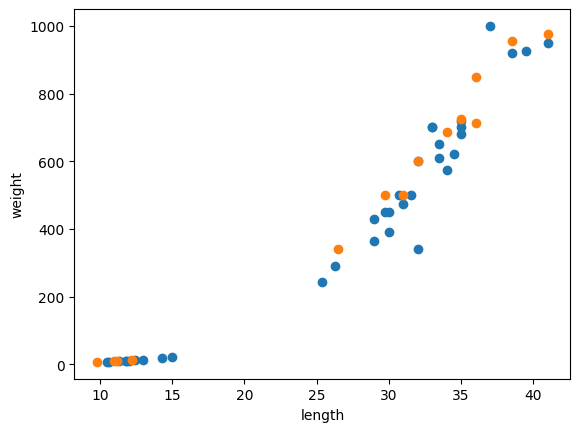

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:,0], test_input[:, 1])

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

matplotlib.pyplot을 통해 훈련 데이터가 잘 섞였는 지를 확인한다.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

# 3. 데이터 전처리
데이터를 머신러닝모델에 쓰기 위해서는 가공하는 과정을 거쳐야한다.

### 넘파이를 이용한 배열 관리
이전, [] 안에 for문과 zip을 통해 2차원 배열을 만들었었다.<br>
넘파이를 이용하면 이런 복잡한 과정없이 메소드를 통해 만들 수 있다.<p>
`fish_data = np.column_stack((fish_length, fish_weight))` : column_stack 메소드를 통해, 두 개의 리스트를 **열 방향**으로 합칠 수 있다.<br>
반대로, row_stack을 쓰면 행 방향으로 배열을 합칠 수 있다. <p>
보통은 행에 샘플을, 열에 특성을 두기 때문에 여기서는 열 방향으로 합쳐보려한다.


In [ ]:
bream_length = [ 25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0,
                34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]

bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0,
                685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_length = bream_length + smelt_length
fish_weight = bream_weight + smelt_weight

import numpy as np

fish_data = np.column_stack((fish_length, fish_weight))
print(fish_data)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


**`fish_target = np.concatenate((np.ones(35), np.zeros(14))`** : concatenate는 전달받은 값을 붙여준다. 이전에 +를 통해 두 개의 리스트를 합쳤던 것과 결과가 같다. <p>
**np.ones(수)** : 입력한 수 만큼 1을 원소로 가지는 배열을 만든다.<br>
**np.zeros(수)** : 입력한 수 만큼 0을 원소로 가지는 배열을 만든다.<p>
만약 0과 1이 아닌 다른 값을 타깃값으로 주고싶다면,**`np.full( 크기(튜플형식), 수 )` 를 통해 구현**할 수 있다.

In [ ]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


### 사이킷런으로 데이터 나누기
이전, arange함수로 index배열을 만들어 input과 target의 데이터 쌍을 유지한 채로 섞었었다. <p>
이번엔, 그렇게 할 필요없이 **사이킷런의 model_selection 모델의 train_test_split 클래스를 통해 분류할 수 있다.**

In [ ]:
bream_length = [ 25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0,
                34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]

bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0,
                685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_length = bream_length + smelt_length
fish_weight = bream_weight + smelt_weight

fish_target = np.concatenate((np.ones(35), np.zeros(14)))

import numpy as np

fish_data = np.column_stack((fish_length, fish_weight))

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target,
                                                                      stratify = fish_target, random_state = 42)
print(train_target)
print(test_target)

[1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1.
 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1.]
[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


fish_data를 두 개로 쪼개 train_input과 test_input으로, fish_target을 두 개로 쪼개 train_target과 test_target으로 만들었다고 보면 된다. <p>
**stratify**를 통해, 전달받은 값이 골고루 섞이도록 데이터를 나눈다. 즉, 여기서는 타겟값이 골고루 섞이도록 훈련세트와 테스트세트를 나누었다고 보면 된다.<p>
random_state는 그냥 seed로, 튜토리얼이나 강좌를 따라갈 때 결과값이 같도록 해준다. 그래서 그렇게 중요한 기능은 아니다.

### 수상한 도미의 등장

[0.]


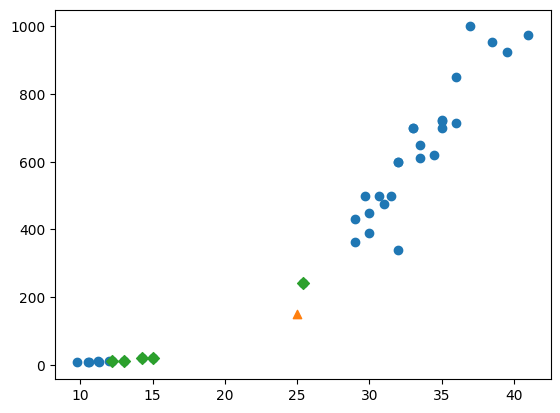

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

print(kn.predict([[25,150]]))

distances, indexes = kn.kneighbors([[25,150]])
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes,1], marker = 'D')

plt.show()

### 기준을 맞춰라

위 산점도를 보면, x축과 y축의 스케일이 다르다. <br> 따라서 plt.xlim((0,1000)) 을 통해 스케일을 y축과 같게 맞추어 보겠다.

[0.]


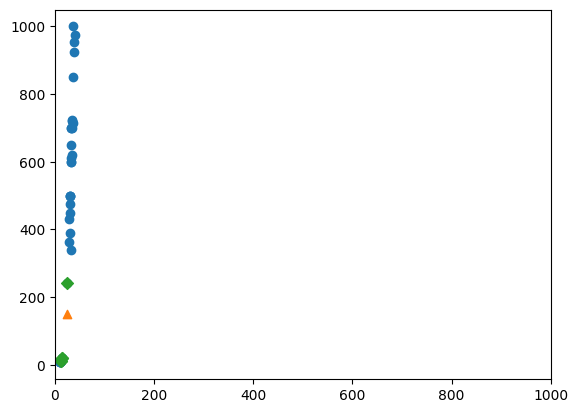

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

print(kn.predict([[25,150]]))

distances, indexes = kn.kneighbors([[25,150]])
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes,1], marker = 'D')
plt.xlim((0,1000))

plt.show()

한 쪽으로 데이터가 몰린 것을 확인할 수 있다.

### 표준 점수로 바꾸기

0을 중심으로 데이터를 고르게 분포시키려한다.

표준화 : 특성 - 평균 / 표준편차

axis = 0, 즉, 행을 따라서 (밑으로)계산한다. 결과로 (1,2) 배열을 얻을 수 있고,

만약 axis = 1이면, 각 행을 하나씩 하나씩 (옆으로) 계산한다. 결과로 (행의개수, 1) 의 배열을 얻을 수 있다.

In [ ]:

mean = np.mean(train_input, axis = 0)
std = np.std(train_input, axis = 0)

print(mean, std)

train_scaled = (train_input - mean) / std

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


사실, train_input 배열은 (36,2)이고, 우리가 구한 mean은 (1,2)이다.<br>
넘파이는 위 같은 계산을, 각 행에 하나하나씩 mean을 빼는 방법으로 처리한다.<br>
이와 같은 걸 **넘파이 브로드캐스팅**이라 한다.

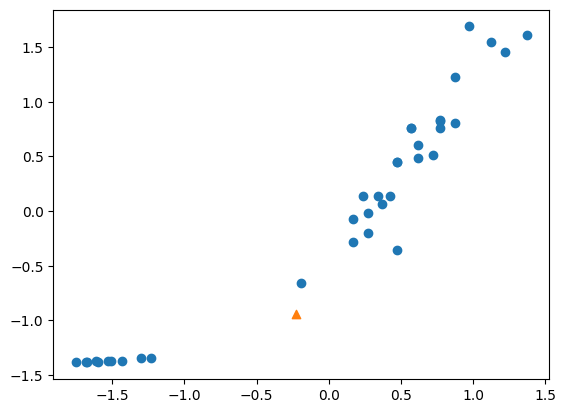

In [ ]:

new = ([25,150] - mean) /std

plt.scatter(train_scaled[:,0] , train_scaled[:,1])

distances, indexes = kn.kneighbors([[25,150]])

plt.scatter(new[0], new[1], marker = '^')

plt.show()

`new = ([25,150] - mean) /std` : 새로운 데이터를 다시 표준화, 즉 전처리 할때, 그 기준은 **테스트 세트가 아닌 훈련세트의 평균과 표준편차**를 사용함에 주의할 것.

### 전처리 데이터에서 모델 훈련


[1.]


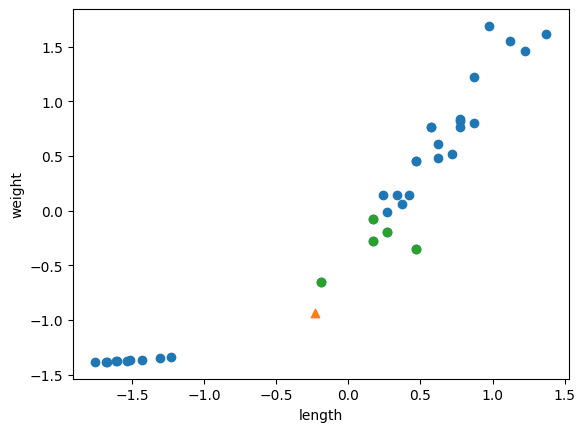

In [ ]:

kn.fit(train_scaled, train_target)

test_scaled = (test_input - mean) / std
kn.score(test_scaled, test_target)

print(kn.predict([new]))

distances, indexes = kn.kneighbors([new])

plt.scatter(train_scaled[:,0] , train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes, 1])

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

